# Challenge 2: Model that predicts a gem's worth based on its characteristics

Plot twist! The expert who priced these gems has now vanished. Francesco needs you to be the new diamond evaluator. He's looking for a model that predicts a gem's worth based on its characteristics. And, because Francesco's clientele is as demanding as he is, he wants the why behind every price tag.

Create another Jupyter notebook where you develop and evaluate your model.


## Let's pick up where we left off

I take the first part of the code from the previuos Notebook:

- Load the data
- Clean the data
- Encode the variables


In [156]:
import pandas as pd

In [157]:
# Load the dataset from the .csv file
diamonds = pd.read_csv("./datasets/diamonds/diamonds.csv")

In [158]:
# Data cleaning
cleaned_diamonds = diamonds[diamonds['price'] > 0][diamonds['x'] >
                                                   0][diamonds['y'] > 0][diamonds['z'] > 0][diamonds['carat'] < 2.5]

# Encode the categorical variables
cut_mapping_dict = {
    "Ideal": 4,
    "Premium": 3,
    "Very Good": 2,
    "Good": 1,
    "Fair": 0,
}

clarity_mapping_dict = {
    "IF": 7,
    "VVS1": 6,
    "VVS2": 5,
    "VS1": 4,
    "VS2": 3,
    "SI1": 2,
    "SI2": 1,
    "I1": 0
}

cleaned_diamonds['cut'] = cleaned_diamonds['cut'].replace(cut_mapping_dict)
cleaned_diamonds['color'] = cleaned_diamonds['color'].apply(
    lambda x: ord('Z') - ord(x))
cleaned_diamonds['clarity'] = cleaned_diamonds['clarity'].replace(
    clarity_mapping_dict)

/var/folders/pv/xl5mq0b9783f3dpv2r1cr1m80000gn/T/ipykernel_94229/3459950869.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_diamonds = diamonds[diamonds['price'] > 0][diamonds['x'] > 0][diamonds['y'] > 0][diamonds['z'] > 0][diamonds['carat'] < 2.5]
/var/folders/pv/xl5mq0b9783f3dpv2r1cr1m80000gn/T/ipykernel_94229/3459950869.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_diamonds = diamonds[diamonds['price'] > 0][diamonds['x'] > 0][diamonds['y'] > 0][diamonds['z'] > 0][diamonds['carat'] < 2.5]
/var/folders/pv/xl5mq0b9783f3dpv2r1cr1m80000gn/T/ipykernel_94229/3459950869.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_diamonds = diamonds[diamonds['price'] > 0][diamonds['x'] > 0][diamonds['y'] > 0][diamonds['z'] > 0][diamonds['carat'] < 2.5]
/var/folders/pv/xl5mq0b9783f3dpv2r1cr1m80000gn/T/ipykernel_94229/3459950869.py:2: UserWarning: Boolean Series key will be

## And don't forget the correlation

In the previous analysis, we found that carat has a very strong correlation with x, y and z.

So we can abandon these columns because they don't provide new information.


In [159]:
cleaned_diamonds = cleaned_diamonds.drop(['x', 'y', 'z'], axis=1)

# Here is the cleaned dataset
cleaned_diamonds.describe()

,carat,cut,color,clarity,depth,table,price
count,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000
mean,0.790486,2.902209,19.394980,3.063253,61.708775,57.445643,3912.023092
std,0.460021,1.120692,1.690805,1.630146,1.442711,2.260970,3947.747397
min,0.230000,0.000000,16.000000,0.000000,44.000000,51.600000,351.000000
25%,0.400000,2.000000,18.000000,2.000000,61.000000,56.000000,942.000000
50%,0.700000,3.000000,19.000000,3.000000,61.800000,57.000000,2392.500000
75%,1.040000,4.000000,21.000000,4.000000,62.500000,59.000000,5353.000000
max,2.480000,4.000000,22.000000,7.000000,70.200000,95.000000,18787.000000


# Here is the idea


### Linear Regression


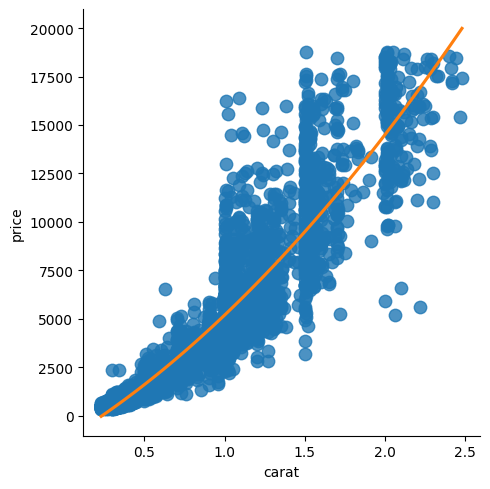

In [160]:
import seaborn as sns
sns.lmplot(x="carat", y="price", data=cleaned_diamonds,
           order=2, ci=None, scatter_kws={"s": 80}, line_kws={"color": "C1"})

So let build our model.

### Split the dataset

I want to fit the data in a model, so I split my data in:

- 75% Training data (`X_train`, `y_train`)
- 25% Test data (`X_test`, `y_test`) to evaluate the model


In [161]:
from sklearn.model_selection import train_test_split
X = cleaned_diamonds[['carat', 'clarity', 'color', 'cut']].copy()
y = cleaned_diamonds[['price']].copy() ** 0.5
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=27)
# X_train, X_test, y_train, y_test

## Fit the model


In [162]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train), reg.get_params()

(0.9496902985134601,
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False})

### So, what is this function?

The function is:

$$ y*{\text{price}} = 65.87965623 \times x*{\text{carat}} + 3.36911559 \times x*{\text{clarity}} + 2.49525413 \times x*{\text{color}} + 0.79278137 \times x\_{\text{cut}} $$


In [163]:
reg.coef_, reg.intercept_

(array([[65.87965623,  3.36911559,  2.49525413,  0.79278137]]),
 array([-57.41074785]))

### How good is the model?

The model works fine, the is no overfitting.

As you can see the error on predicting the `train` set is similar to the error of the `test` set.


In [164]:
from sklearn.metrics import mean_absolute_error
y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)
mean_absolute_error(y_test, y_test_pred), mean_absolute_error(
    y_train, y_train_pred)

(4.330085122294304, 4.52852872300758)

<Axes: xlabel='carat', ylabel='price'>

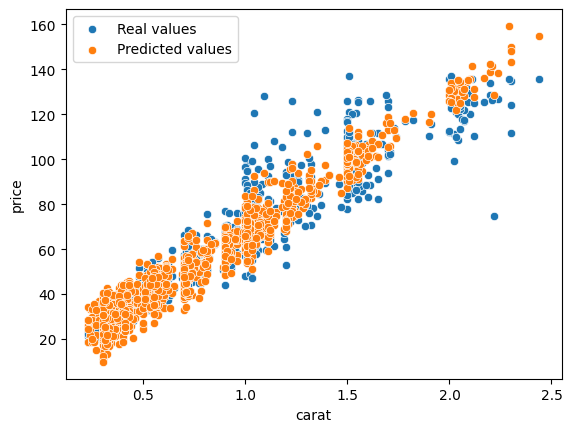

In [165]:
sns.scatterplot(x=X_test['carat'], y=y_test['price'], label='Real values')
sns.scatterplot(x=X_test['carat'],
                y=y_test_pred.flatten(), label='Predicted values')

<Axes: xlabel='carat', ylabel='price'>

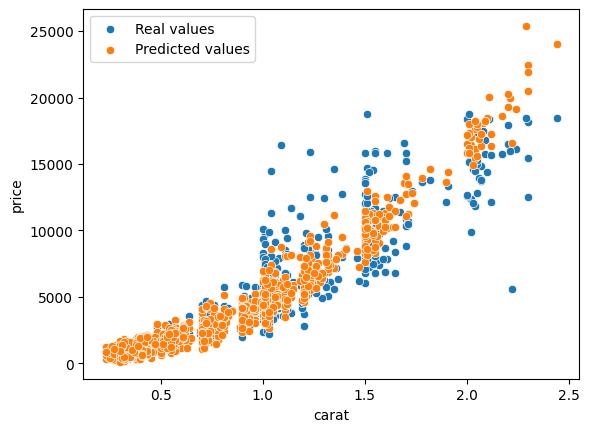

In [166]:
sns.scatterplot(x=X_test['carat'], y=y_test['price'] ** 2, label='Real values')
sns.scatterplot(x=X_test['carat'], y=y_test_pred.flatten()
                ** 2, label='Predicted values')